We begin with a simple base case:

\begin{align}
&Ax \approx b \\
&A \in \mathbb{R}^{m \times n}\\
&b \in \mathbb{R}^m
\end{align}

With nice, well-behaved matrices we'd have something like this

In [14]:
# A = np.array([[1,2,1],[3,2,3],[4,1,1]])
# y = np.linalg.inv(x)
# b = np.array([6,8,9]).transpose()
# print(A)
# print(y)
# print(b)
# X = np.dot(y,b)
# np.dot(A,X)

[[1 2 1]
 [3 2 3]
 [4 1 1]]
[[-8.33333333e-02 -8.33333333e-02  3.33333333e-01]
 [ 7.50000000e-01 -2.50000000e-01 -7.93016446e-18]
 [-4.16666667e-01  5.83333333e-01 -3.33333333e-01]]
[6 8 9]


array([6., 8., 9.])

Nonetheless, our objective remains the same.  We want to find $x \in \mathbb{R}^n$

But we want an example that is a bit more _realistic_ - something requiring a stochastic approach necessitating gradient descent.

Let:

\begin{align}
A &= \text{random array of size }m \times n\\
x^{\ast} &= \text{random array of size } m\\
b &= Ax^{\ast} + \text{noise}
\end{align}

We'll then look to minimise the distance

\begin{align}
\text{min } x: \\
f(x) &= \frac{1}{2} \|Ax - b \|^2\\
\nabla f(x) &= A^T(Ax -b)
\end{align}

To keep things visually workable, we'll set $n = 2$.

In [89]:
import numpy as np
import matplotlib.pyplot as plt

A = np.random.rand(50,2)*1000
x = np.random.rand(2,1)*1000
temp = np.matmul(A,x)
b = temp + np.random.normal(0,100,temp.shape)

def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,x)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(A.transpose(),(np.matmul(a,X)-B))



In [96]:
def vanilla(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

In [90]:
L = np.max(np.linalg.svd(np.matmul(A,A.transpose()))[1])
lamb = 1/L

25026821.495950375

In [120]:
lamb

3.995713159826594e-08

In [119]:
L = np.max(np.linalg.svd(np.matmul(A,A.transpose()))[1])
lamb = 1/L

Trying vanilla, with $L$ set to initial value.

In [121]:
L = np.max(np.linalg.svd(np.matmul(A,A.transpose()))[1])
lamb = 1/L
print(x)
print(np.linalg.norm(f_grad(x)))
x1 = vanilla(x,lamb,f_grad)
print(x1)
print(np.linalg.norm(f_grad(x1)))
x2 = vanilla(x1,lamb,f_grad)
print(x2)
print(np.linalg.norm(f_grad(x2)))
x3 = vanilla(x2,lamb,f_grad)
print(x3)
print(np.linalg.norm(f_grad(x3)))

[[504.7042159 ]
 [996.23923383]]
22076.730768698777
[[504.70479621]
 [996.23856946]]
18626.76240231071
[[504.70528582]
 [996.23800891]]
15715.92647566791
[[504.70569893]
 [996.23753596]]
13259.971843644775


Trying vanilla GD manually, with $$L = \frac{\|\nabla f(x_{k+1}) - \nabla f(x_k) \|}{\|x_{k+1} - x_k \|}$$

In [122]:
L = np.max(np.linalg.svd(np.matmul(A,A.transpose()))[1])
lamb = 1/L

print('x_0: ',x)
print('f grad(x_0): ',np.linalg.norm(f_grad(x)))
print('lambda_0: ',lamb)

x1 = vanilla(x,lamb,f_grad)
print('x_1: ',x1)
print('f grad(x_1): ',np.linalg.norm(f_grad(x1)))
L = np.linalg.norm(f_grad(x1) - f_grad(x))/np.linalg.norm(x1 - x)
lamb = 1/L
print('lambda_1: ',lamb)


x2 = vanilla(x1,lamb,f_grad)
print('x_2: ',x2)
print('f grad(x_2): ',np.linalg.norm(f_grad(x2)))
L = np.linalg.norm(f_grad(x2) - f_grad(x1))/np.linalg.norm(x2 - x1)
lamb = 1/L
print('lambda_2: ',lamb)

x3 = vanilla(x2,lamb,f_grad)
print('x_3: ',x3)
print('f grad(x_3): ',np.linalg.norm(f_grad(x3)))

x_0:  [[504.7042159 ]
 [996.23923383]]
f grad(x_0):  22076.730768698777
lambda_0:  3.995713159826594e-08
x_1:  [[504.70479621]
 [996.23856946]]
f grad(x_1):  18626.76240231071
lambda_1:  2.556901231758084e-07
x_2:  [[504.70792932]
 [996.23498244]]
f grad(x_2):  8.13516861489994e-06
lambda_2:  2.5569012317295503e-07
x_3:  [[504.70792932]
 [996.23498244]]
f grad(x_3):  4.480899500061042e-05


In [103]:
L = np.linalg.norm(f_grad(x1) - f_grad(x))/np.linalg.norm(x1 - x)
lamb = 1/L
lamb

2.556901231758084e-07

In [104]:
x2 = vanilla(x1,lamb,f_grad)

In [105]:
x2

array([[504.70792932],
       [996.23498244]])

In [106]:
L = np.linalg.norm(f_grad(x2) - f_grad(x1))/np.linalg.norm(x2 - x1)
lamb = 1/L
lamb

2.5569012317295503e-07

In [107]:
x3 = vanilla(x2,lamb,f_grad)

In [108]:
x3

array([[504.70792932],
       [996.23498244]])

In [114]:
np.linalg.norm(f_grad(x))

22076.730768698777

In [115]:
np.linalg.norm(f_grad(x1))

18626.76240231071

In [116]:
np.linalg.norm(f_grad(x2))

8.13516861489994e-06

In [117]:
np.linalg.norm(f_grad(x3))

4.480899500061042e-05

In [82]:
def van_gd(x, step, gradient_function):
    while np.linalg.norm(gradient_function(x)) > 1e-7:
        x = vanilla(x,step, gradient_function)
        print(x, np.linalg.norm(gradient_function(x)))
        van_gd(x, step, gradient_function)
    return x

In [83]:
van_gd(x,lamb,f_grad)

[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.4316

 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.0870

 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.0870

[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.4316

 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.0870

[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.4316

[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.4316

 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.08708111]] 5.053702530175131e-07
[[434.43169157]
 [407.0870

RecursionError: maximum recursion depth exceeded while calling a Python object

In [84]:
x

array([[434.43169157],
       [407.08708111]])

In [87]:
lamb

4.038051917715254e-08

In [85]:
np.linalg.norm(f_grad(x))

5.053702530175131e-07

In [86]:
x1 = vanilla(x, lamb, f_grad)
x1

array([[434.43169157],
       [407.08708111]])

In [50]:
np.linalg.norm(f_grad(x1))

1.8009323012827592e-07

In [51]:
x2 = vanilla(x1, lamb, f_grad)
x2

array([[0.9287047 ],
       [0.82985193]])

In [52]:
np.linalg.norm(f_grad(x2))

1.2358595351711813e-07

Clearly we are taking a long long time to get anywhere near convergence.  In fact, we can see that step sizes slow down to the extent where python can no longer determine the difference between both values of $(x_{k+1}, x_k)$ and of $(f(x_{k+1}),f(x_k))$.

how to check with actual elements that the gradient of f is the required expression?

In [2]:
A

array([[0.55091482, 0.79396573],
       [0.38277013, 0.51650683],
       [0.8096726 , 0.40762745],
       [0.17594191, 0.14123716],
       [0.88044078, 0.52852865],
       [0.16100442, 0.1312873 ],
       [0.43490891, 0.08799874],
       [0.46157659, 0.57836288],
       [0.32538521, 0.34045994],
       [0.52168571, 0.28012805],
       [0.93687124, 0.25897844],
       [0.81500714, 0.86331055],
       [0.76427244, 0.616799  ],
       [0.0986958 , 0.20048308],
       [0.23252464, 0.31125409],
       [0.4318254 , 0.44654194],
       [0.09051255, 0.18082968],
       [0.12172073, 0.43001846],
       [0.83511999, 0.60784851],
       [0.72806842, 0.12145771],
       [0.72221527, 0.12412575],
       [0.36380954, 0.72688197],
       [0.61737906, 0.93554696],
       [0.99103516, 0.31261451],
       [0.02917421, 0.67168125],
       [0.31967358, 0.25071893],
       [0.36348181, 0.77192979],
       [0.25443982, 0.77954927],
       [0.35675495, 0.80055343],
       [0.01147412, 0.19597167],
       [0.

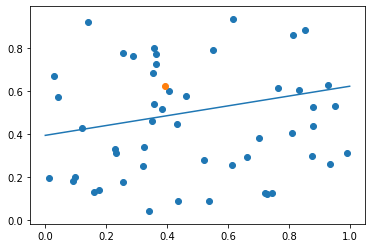

In [6]:
plt.scatter(A[:,0],A[:,1])
plt.plot(x)
plt.scatter(x[0], x[1])
plt.show()

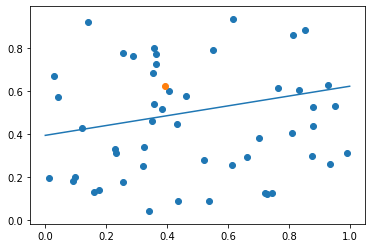

In [7]:
plt.scatter(A[:,0],A[:,1])
plt.plot(x)
plt.scatter(x[0], x[1])
plt.show()

In [3]:
x[1]

array([0.62331845])